In [9]:
from ultralytics import YOLO
import cv2

# 모델 로드
model = YOLO('runs/detect/train3/weights/best.pt')

# 테스트 이미지 경로
image_path = './datasets/valid/images/img_1000_jpg.rf.a33f78585bd5340c7d146bb6441df603.jpg'

# 이미지 로드
image = cv2.imread(image_path)

# 객체 검출
results = model(image)[0]



0: 640x640 1 Cactus, 1 Tyrannosaurus, 53.7ms
Speed: 4.9ms preprocess, 53.7ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)


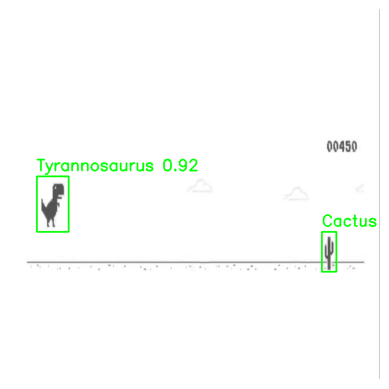

In [11]:
import cv2
import matplotlib.pyplot as plt

# 검출된 객체 박스 가져오기
boxes = results.boxes  # Boxes object
names = results.names  # 클래스 이름

# 원본 이미지 가져오기
orig_img = results.orig_img

# 박스 정보 출력
for box in boxes:
    # 박스 좌표 및 클래스 ID 가져오기
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cls_id = int(box.cls)
    confidence = box.conf[0]  # 확률 값 가져오기
    
    # 클래스 이름과 확률 가져오기
    label = f"{names[cls_id]} {confidence:.2f}"

    # 박스 그리기
    cv2.rectangle(orig_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(orig_img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# 결과 이미지 표시
plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
